In [1]:
import yaml

In [ ]:
yaml.safe_load()

In [2]:
import pandas as pd
import numpy as np

In [3]:
import os

In [4]:
os.listdir()

['.ipynb_checkpoints', 'example.ipynb', 'housing.csv']

In [6]:
df = pd.read_csv("housing.csv")

In [7]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


<AxesSubplot:ylabel='Frequency'>

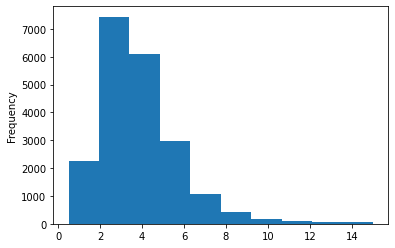

In [8]:
df["median_income"].plot(kind="hist")

In [9]:
df["income_cat"] = pd.cut(df["median_income"],bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],labels=[1,2,3,4,5])

<AxesSubplot:ylabel='income_cat'>

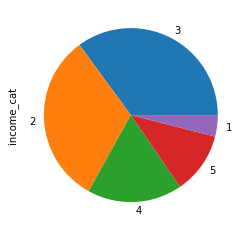

In [14]:
df["income_cat"].value_counts().plot(kind="pie")

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

In [16]:
suffle = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

In [22]:
for X_train_index, X_test_index in suffle.split(df, df["income_cat"]):
    print(X_train_index, "   -----    ", X_test_index)
    X_train = df.loc[X_train_index]
    X_test = df.loc[X_test_index]

[20198  2092 16668 ...  7860  9478 14678]    -----     [11620  2124  8315 ... 17048 19868 16611]


<AxesSubplot:ylabel='income_cat'>

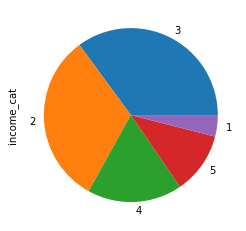

In [24]:
X_train["income_cat"].value_counts().plot(kind="pie")

<AxesSubplot:ylabel='income_cat'>

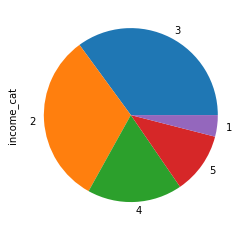

In [25]:
X_test["income_cat"].value_counts().plot(kind="pie")

In [33]:
# creating Config for income data:
index_name = X_test.dtypes.index

In [28]:
X_test.dtypes.values

array([dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'),
       CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)],
      dtype=object)

In [32]:
dtype_list_name = list(map(lambda x : str(x).replace("dtype(", "").replace(")",""), X_train.dtypes.values))

In [34]:
dict(zip(index_name, dtype_list_name))

{'longitude': 'float64',
 'latitude': 'float64',
 'housing_median_age': 'float64',
 'total_rooms': 'float64',
 'total_bedrooms': 'float64',
 'population': 'float64',
 'households': 'float64',
 'median_income': 'float64',
 'median_house_value': 'float64',
 'ocean_proximity': 'object',
 'income_cat': 'category'}

In [41]:
yaml.dump(dict(zip(index_name, dtype_list_name)), open("schema.yaml",'w'))